In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score

In [2]:
df=pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   object 
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), object(1)
memory usage: 200.6+ KB


In [5]:
#df_encoded = pd.get_dummies(df, columns=['Gender', 'SmokingStatus'], drop_first=True)
#or
df['Gender']= df['Gender'].map({'Male': 1, 'Female': 0})
#df.dropna(inplace=True)
X=df[['Gender','Height']]
y=df['Weight']


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)

# Task-01: Apply Linear Regression

In [7]:

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [8]:
X_train.shape

(5988, 2)

In [9]:
X_test.shape

(2567, 2)

In [10]:
predicted_weight=reg.predict(X_test)
#predicted_weight=reg.predict([[1,74.110105]])
print("Now,we checke for Weight for Height 74.11= ",predicted_weight)

Now,we checke for Weight for Height 74.11=  [143.83013436 197.53417989 184.63515112 ... 160.7078525  186.82852694
 201.4226542 ]


In [11]:
reg.score(X_train, y_train)

0.8972135459668117

In [12]:
reg.score(X_test, y_test)

0.9059959607091161

In [13]:
y=reg.predict(X_test) 
mse = mean_squared_error(y_test, y)
print("Testing MSE for whole test set: ", mse)

Testing MSE for whole test set:  99.6725099807003


# Task-02: Apply KNN Regressor (Scikit-Learn)

In [14]:
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust n_neighbors as needed
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [15]:
X_train.shape

(5988, 2)

In [16]:
X_test.shape

(2567, 2)

In [17]:
predicted_weight_knn=knn_model.predict(X_test)
#predicted_weight=knn_model.predict([[1,74.110105]])
print("Now,we checke for Weight for Height 74.11= ",predicted_weight)

Now,we checke for Weight for Height 74.11=  [143.83013436 197.53417989 184.63515112 ... 160.7078525  186.82852694
 201.4226542 ]


In [18]:
knn_model.score(X_train, y_train)

0.9170756955071054

In [19]:
knn_model.score(X_test, y_test)

0.8838502073708883

In [20]:
y = knn_model.predict(X_test)
mse = mean_squared_error(y_test, y)
print("KNN Regression - Testing MSE for whole test set:", mse)

KNN Regression - Testing MSE for whole test set: 123.15365863436983


# Compare KNN & Linear Regression as well.

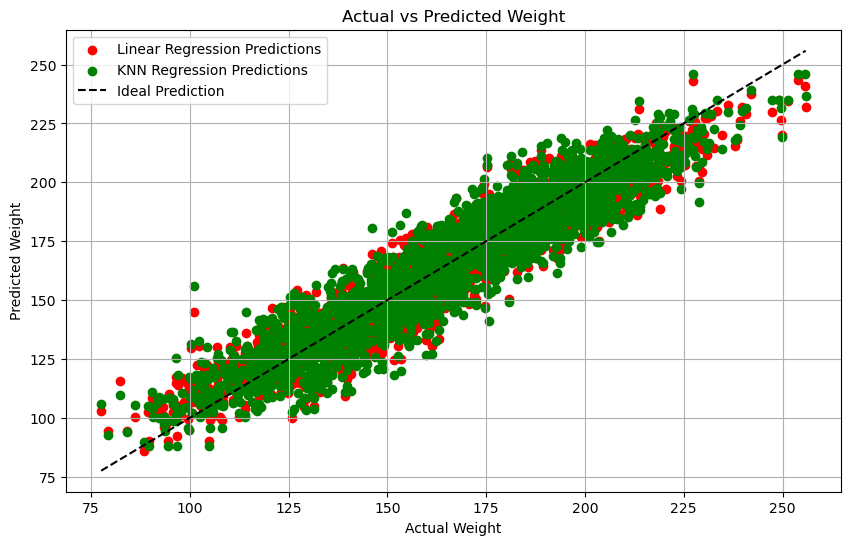

In [21]:
# Create a figure
plt.figure(figsize=(10, 6))

# Scatter plots for predictions
plt.scatter(y_test, predicted_weight, color='red', label='Linear Regression Predictions')
plt.scatter(y_test, predicted_weight_knn, color='green', label='KNN Regression Predictions')

# Ideal line where predicted equals actual
ideal_line = np.linspace(min(y_test), max(y_test), 100)
plt.plot(ideal_line, ideal_line, color='black', linestyle='--', label='Ideal Prediction')

# Labels and title
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Actual vs Predicted Weight')
plt.legend()
plt.grid(True)  # Optional: Add grid for better readability
plt.show()

In [27]:
if reg.score(X_test, y_test) > knn_model.score(X_test, y_test):
    print("Linear Regression performs better.Beacuse-")
    print("Linear Regression Score:", reg.score(X_test, y_test))
    print("KNN Score:", knn_model.score(X_test, y_test))
else:
    print("KNN Regression performs better.Beacuse-")
    print("KNN Score:", knn_model.score(X_test, y_test))
    print("KNN Regression Score:", knn_model.score(X_test, y_test))

Linear Regression performs better.Beacuse-
Linear Regression Score: 0.9059959607091161
KNN Score: 0.8838502073708883
